<a href="https://colab.research.google.com/github/vishmithSuranjaya/Colab_notebooks/blob/main/Simple_ML_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple and Quick ML Project Workflow Demo

In [1]:
! pip install ydata-profiling ## Install these dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


# 🫀 Heart Failure Prediction Dataset

### **Overview**

This dataset contains **11 clinical features** used to predict the likelihood of **heart disease events**.

### **Business Use Case**

Early detection of heart disease can **save lives and reduce healthcare costs**.
Using this dataset, a **machine learning model** can help hospitals and healthcare providers:

* Identify high-risk patients early
* Recommend preventive treatments
* Optimize resource allocation for cardiac care

---

### **Context**

Cardiovascular disease is a leading cause of death worldwide.
People at high risk — due to factors like hypertension, diabetes, or high cholesterol — need timely diagnosis and intervention.
A predictive model can support **early detection and proactive care planning**.

---

### **Attribute Information**

| Feature            | Description                                                                                               |
| ------------------ | --------------------------------------------------------------------------------------------------------- |
| **Age**            | Age of the patient (years)                                                                                |
| **Sex**            | Sex of the patient *(M: Male, F: Female)*                                                                 |
| **ChestPainType**  | Type of chest pain *(TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)* |
| **RestingBP**      | Resting blood pressure (mm Hg)                                                                            |
| **Cholesterol**    | Serum cholesterol (mg/dl)                                                                                 |
| **FastingBS**      | Fasting blood sugar *(1: >120 mg/dl, 0: ≤120 mg/dl)*                                                      |
| **RestingECG**     | ECG results *(Normal, ST: ST-T abnormality, LVH: Left Ventricular Hypertrophy)*                           |
| **MaxHR**          | Maximum heart rate achieved (60–202)                                                                      |
| **ExerciseAngina** | Exercise-induced angina *(Y: Yes, N: No)*                                                                 |
| **Oldpeak**        | ST depression induced by exercise                                                                         |
| **ST_Slope**       | Slope of the peak exercise ST segment *(Up, Flat, Down)*                                                  |
| **HeartDisease**   | Target variable *(1: Heart disease, 0: Normal)*                                                           |

---

### **Goal**

Build a **predictive model** that can classify whether a patient is likely to have heart disease based on their clinical measurements.





##1. Loading the Dataset


In [2]:
## First and foremost import the dependencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [3]:

file_path = "./heart.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  file_path,

)

/tmp/ipython-input-2427926081.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


In [ ]:
# View the dataset

df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
# Get an idea about the data points and columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 2. EDA : Explainatory Data Analysis

In [ ]:
# Create a quick EDA profile

profile = ProfileReport(df, title="Profiling Report")
# View the profile

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 27.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Data Preprocessing

In [4]:
## Finding null values

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Remove any duplicates

df.drop_duplicates(inplace=True)

In [5]:
## Feature Engineering : MAking some new features using existing ones

## Abnormal flag for Blood Pressure

df.loc[ df['RestingBP'] <= 120, 'RestingBP'] = 0 #normal (0)
df.loc[(df['RestingBP'] > 120), 'RestingBP'] = 1 #abnormal (1)

In [ ]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA          1          289          0     Normal   
1     49   F           NAP          1          180          0     Normal   
2     37   M           ATA          1          283          0         ST   
3     48   F           ASY          1          214          0     Normal   
4     54   M           NAP          1          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA          0          264          0     Normal   
914   68   M           ASY          1          193          1     Normal   
915   57   M           ASY          1          131          0     Normal   
916   57   F           ATA          1          236          0        LVH   
917   38   M           NAP          1          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [6]:
# Encoding Categorical variables

to_categorical=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']


L_encoder=LabelEncoder()

for label in to_categorical:
    df[label]=L_encoder.fit_transform(df[label])

In [7]:
df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1          1          289          0           1   
1     49    0              2          1          180          0           1   
2     37    1              1          1          283          0           2   
3     48    0              0          1          214          0           1   
4     54    1              2          1          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3          0          264          0           1   
914   68    1              0          1          193          1           1   
915   57    1              0          1          131          0           1   
916   57    0              1          1          236          0           0   
917   38    1              2          1          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

In [10]:
# Splitting the dataset

X=df.drop('HeartDisease',axis=1) # Features
y=df['HeartDisease'] # Label/Target variable

In [11]:
# Train Test Split

x_train,x_test,y_train,y_tets=train_test_split(X,y,shuffle=True,test_size=0.3) # 70% of data goes for training and Rest 30% goes for Testing

## 4. Building the Model

In [12]:
## Logisitc Regression Model

LR = LogisticRegression() #initiate the model

LR.fit(x_train,y_train) #train the model


## Train and test accuracy scores (mean)

print("LR training score :",LR.score(x_train,y_train))
print("LR testing score :",LR.score(x_test,y_tets))

LR_test_score =  round(LR.score(x_test, y_tets) * 100, 2)

LR training score : 0.8535825545171339
LR testing score : 0.8586956521739131


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
## SVC (Supplort Vector Classifier) model

svc = SVC()

svc.fit(x_train,y_train)

print("svc training score :",svc.score(x_train,y_train))
print("svc testing score :",svc.score(x_test,y_tets))

svc_test_score =  round(svc.score(x_test, y_tets) * 100, 2)


svc training score : 0.7274143302180686
svc testing score : 0.6956521739130435


In [14]:
# Random Forest Classifier Model



RF = RandomForestClassifier()

RF.fit(x_train,y_train)

print("RF training score :",RF.score(x_train,y_train))
print("RF testing score :",RF.score(x_test,y_tets))

RF_test_score = round(RF.score(x_test, y_tets) * 100, 2)


RF training score : 1.0
RF testing score : 0.8804347826086957


In [16]:
# Gradient Boosting Model


GBC = GradientBoostingClassifier()

GBC.fit(x_train,y_train)

print("GBC training score :",GBC.score(x_train,y_train))
print("GBC testing score :",GBC.score(x_test,y_tets))

GBC_test_score = round(GBC.score(x_test, y_tets) * 100, 2)

GBC training score : 0.9485981308411215
GBC testing score : 0.8659420289855072


In [17]:
## KNN Classification Model

KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

print("KNN training score :",KNN.score(x_train,y_train))
print("KNN testing score :",KNN.score(x_test,y_tets))

KNN_test_score = round(KNN.score(x_test, y_tets) * 100, 2)

KNN training score : 0.7866043613707165
KNN testing score : 0.7028985507246377


In [18]:
# Decision Tree Model

DT = DecisionTreeClassifier()

DT.fit(x_train,y_train)

print("DT training score :",DT.score(x_train,y_train))
print("DT testing score :",DT.score(x_test,y_tets))

DT_test_score = round(DT.score(x_test, y_tets) * 100, 2)


DT training score : 1.0
DT testing score : 0.7971014492753623


In [ ]:
# Add Hyperparameter tuning phase per each model



## 5. Evaluate Models


In [19]:
lr_test_score = round(LR.score(x_test, y_tets) * 100, 2)
svc_test_score = round(svc.score(x_test, y_tets) * 100, 2)
rf_test_score = round(RF.score(x_test, y_tets) * 100, 2)
gbc_test_score = round(GBC.score(x_test, y_tets) * 100, 2)
knn_test_score = round(KNN.score(x_test, y_tets) * 100, 2)
dt_test_score = round(DT.score(x_test, y_tets) * 100, 2)

In [ ]:
# View the best performing models based on mean accuracy

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest','GradientBoostingClassifier','Decision Tree'
              ],
    'Score': [svc_test_score, knn_test_score, lr_test_score,
              rf_test_score, gbc_test_score,dt_test_score
              ]})
models.sort_values(by='Score', ascending=False).style.background_gradient(cmap='Reds')

In [20]:
# get each models predictions on test datasets

LR_predict=LR.predict(x_test)
svc_predict=svc.predict(x_test)
RF_predict=RF.predict(x_test)
GBC_predict=GBC.predict(x_test)
KNN_predict=KNN.predict(x_test)
DT_predict=DT.predict(x_test)

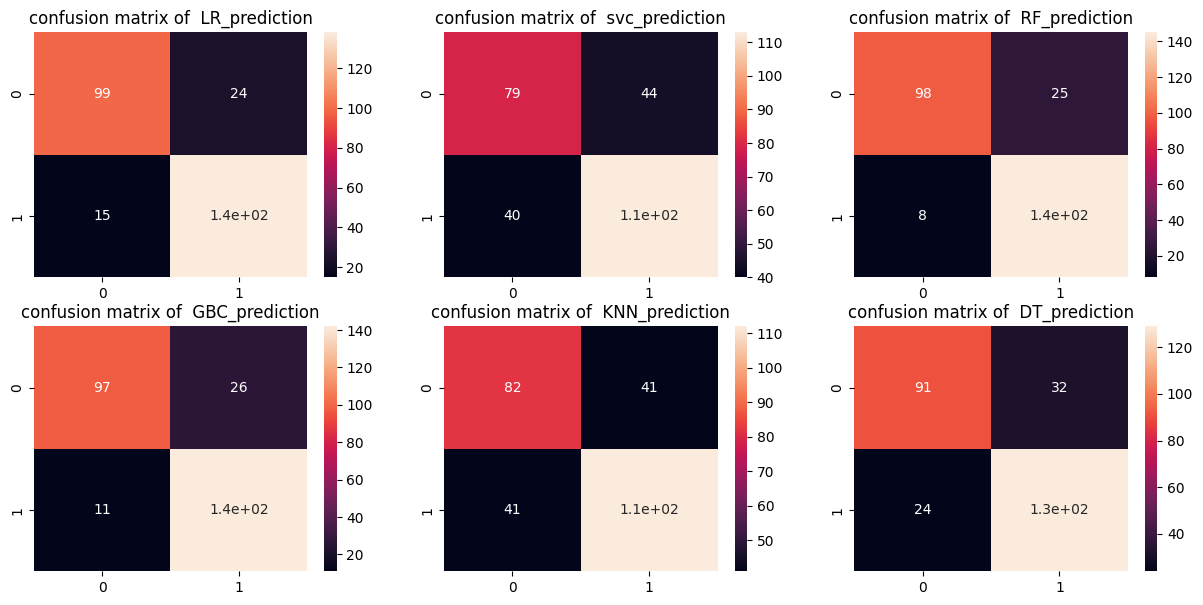

In [21]:
# Draw Confusion Matrices per each model

models_predictions=[LR_predict,svc_predict,RF_predict,GBC_predict,KNN_predict,DT_predict]
label={1:'LR_predict',2:'svc_predict',3:'RF_predict',4:'GBC_predict',5:'KNN_predict',6:'DT_predict'}
plt.figure(figsize=(15,7))
for n,model in enumerate(models_predictions,1) :
    cm = confusion_matrix(y_tets,model)
    plt.subplot(2,3,n)
    sns.heatmap(cm,annot=True)
    plt.title('confusion matrix of  '+ label[n]+'ion')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models_predictions = [LR_predict, svc_predict, RF_predict, GBC_predict, KNN_predict, DT_predict]
label = {
    1: 'LR_predict',
    2: 'svc_predict',
    3: 'RF_predict',
    4: 'GBC_predict',
    5: 'KNN_predict',
    6: 'DT_predict'
}

plt.figure(figsize=(15, 7))

for n, model in enumerate(models_predictions, 1):
    cm = confusion_matrix(y_test, model)  # fixed typo from y_tets to y_test
    plt.subplot(2, 3, n)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix of ' + label[n])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()



NameError: name 'y_test' is not defined

<Figure size 1500x700 with 0 Axes>